In [1]:
import warnings
warnings.filterwarnings("ignore")

from jqdatasdk import *
auth('18810883096', 'Ww19930921')
# 查询是否连接成功
is_auth = is_auth()

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [2]:
# 获取计算机/互联网行业的成分股
stocks = get_industry_stocks('801040')
print(stocks)

['000708.XSHE', '000709.XSHE', '000717.XSHE', '000761.XSHE', '000778.XSHE', '000825.XSHE', '000898.XSHE', '000932.XSHE', '000959.XSHE', '002075.XSHE', '002110.XSHE', '002318.XSHE', '002443.XSHE', '002478.XSHE', '002756.XSHE', '600010.XSHG', '600019.XSHG', '600022.XSHG', '600117.XSHG', '600126.XSHG', '600231.XSHG', '600282.XSHG', '600307.XSHG', '600399.XSHG', '600507.XSHG', '600569.XSHG', '600581.XSHG', '600782.XSHG', '600808.XSHG', '601003.XSHG', '601005.XSHG', '603878.XSHG', '603995.XSHG']


In [3]:
stock_name={}
for stock in stocks:
    stock_name[stock]=get_security_info(stock).display_name

In [4]:
# 获取一支股票
start_date="2019-04-19"
end_date="2020-07-26"

df_dict={}
for stock in stocks:
    df_dict[stock] = get_price(stock, start_date=start_date, end_date=end_date,fq="pre") # 获得000001.XSHG的2015年12月1号14:00-2015年12月2日12:00的分钟数据
print("load data")

load data


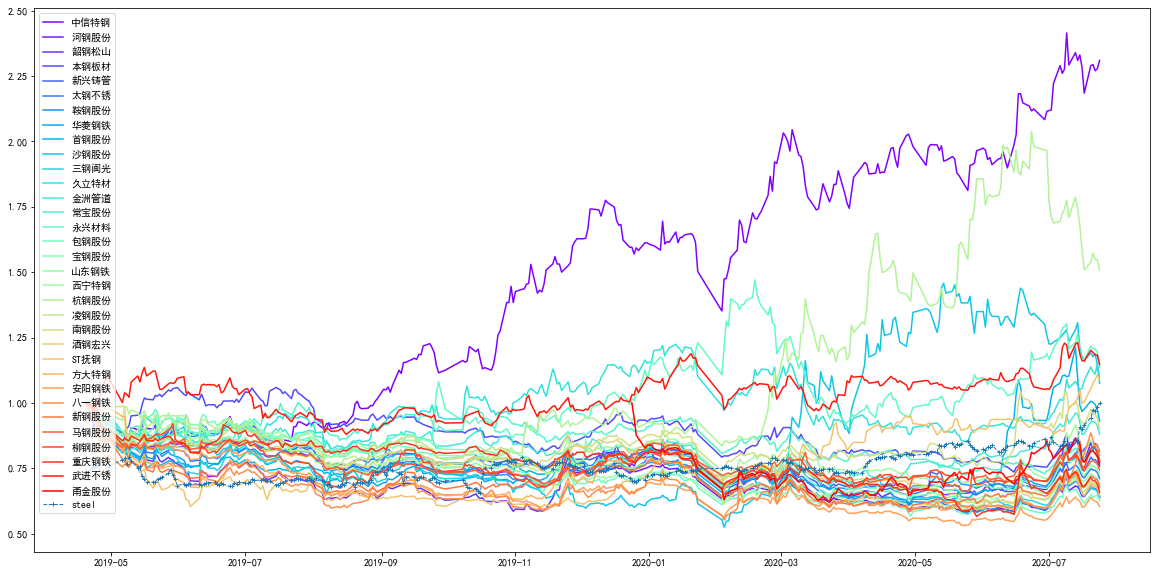

In [5]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

import numpy as np

x = np.linspace(0, 1, 100)
number = len(stocks)
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

plt.rcParams['figure.figsize'] = (20.0, 10.0) # 显示大小
for i, stock in enumerate(stocks):
    df=df_dict[stock].dropna()
    plt.plot(df['close']/df['close'][0],color=colors[i],label=stock_name[stock])
    
df_indus = finance.run_query(
    query(finance.SW1_DAILY_PRICE).filter(
        finance.SW1_DAILY_PRICE.code == '801040',
        finance.SW1_DAILY_PRICE.date >= start_date,
        finance.SW1_DAILY_PRICE.date <= end_date).order_by(
        finance.SW1_DAILY_PRICE.date.desc()).limit(1000))
plt.plot(list(df_dict[stock].T),df_indus['close']/df_indus['close'].values[-1],marker='+', linestyle='--', linewidth=1, markersize=4,label="steel")
plt.legend()

In [6]:
import pandas as pd
stock_return={}
for stock in stocks:
    df=df_dict[stock].dropna()
    stock_return[stock]=(df['close']/df['close'][0]).values[-1]
df_stock=pd.DataFrame({'name':stock_name,
       'return':stock_return})
df_stock.sort_values(by="return",inplace=True,ascending=False)
print(df_indus["close"].values[0]/df_indus["close"].values[-1])
print(df_stock)


0.7235964692329776
             name    return
000708.XSHE  中信特钢  2.309406
600126.XSHG  杭钢股份  1.506616
603878.XSHG  武进不锈  1.147143
002756.XSHE  永兴材料  1.136279
002318.XSHE  久立特材  1.094750
600399.XSHG  ST抚钢  1.087527
002075.XSHE  沙钢股份  1.075453
000959.XSHE  首钢股份  0.930283
600282.XSHG  南钢股份  0.899160
002443.XSHE  金洲管道  0.880463
000761.XSHE  本钢板材  0.813679
000932.XSHE  华菱钢铁  0.802178
600117.XSHG  西宁特钢  0.801909
600581.XSHG  八一钢铁  0.781065
601003.XSHG  柳钢股份  0.774448
000717.XSHE  韶钢松山  0.774250
002478.XSHE  常宝股份  0.773585
603995.XSHG  甬金股份  0.763434
000778.XSHE  新兴铸管  0.757700
600808.XSHG  马钢股份  0.743169
600019.XSHG  宝钢股份  0.725258
000825.XSHE  太钢不锈  0.711066
600022.XSHG  山东钢铁  0.688776
600782.XSHG  新钢股份  0.678797
600307.XSHG  酒钢宏兴  0.663934
600231.XSHG  凌钢股份  0.663793
601005.XSHG  重庆钢铁  0.657895
600507.XSHG  方大特钢  0.646991
000709.XSHE  河钢股份  0.641399
000898.XSHE  鞍钢股份  0.639225
002110.XSHE  三钢闽光  0.635531
600010.XSHG  包钢股份  0.627027
600569.XSHG  安阳钢铁  0.604457


In [7]:
print(df_dict["002110.XSHE"])


             open  close   high    low      volume         money
2019-04-19  10.89  10.92  10.95  10.76  30368659.0  3.293366e+08
2019-04-22  10.96  10.74  11.00  10.73  40977162.0  4.438971e+08
2019-04-23  10.71  10.77  10.85  10.61  34361038.0  3.680922e+08
2019-04-24  10.74  10.84  10.85  10.69  24870836.0  2.679995e+08
2019-04-25  10.78  10.55  10.84  10.53  33021448.0  3.534599e+08
...           ...    ...    ...    ...         ...           ...
2020-07-20   7.07   7.42   7.49   7.06  39573428.0  2.889958e+08
2020-07-21   7.42   7.33   7.47   7.26  23290571.0  1.709884e+08
2020-07-22   7.34   7.29   7.42   7.26  24500616.0  1.799112e+08
2020-07-23   7.21   7.21   7.30   7.08  23211146.0  1.666310e+08
2020-07-24   7.18   6.94   7.24   6.89  30248615.0  2.127889e+08

[308 rows x 6 columns]
